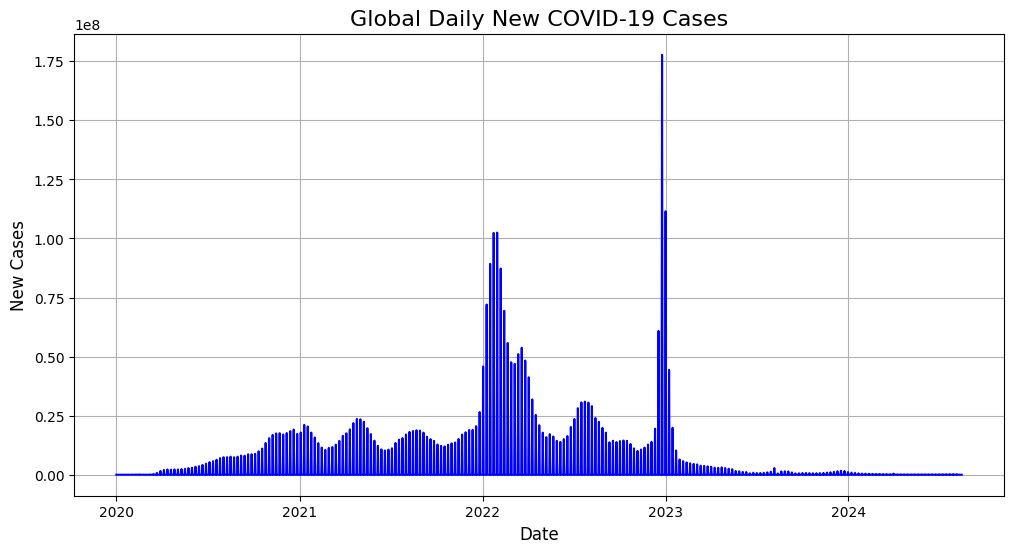

<ipython-input-2-d07e1f07deee>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='total_cases', y='location', palette='viridis')


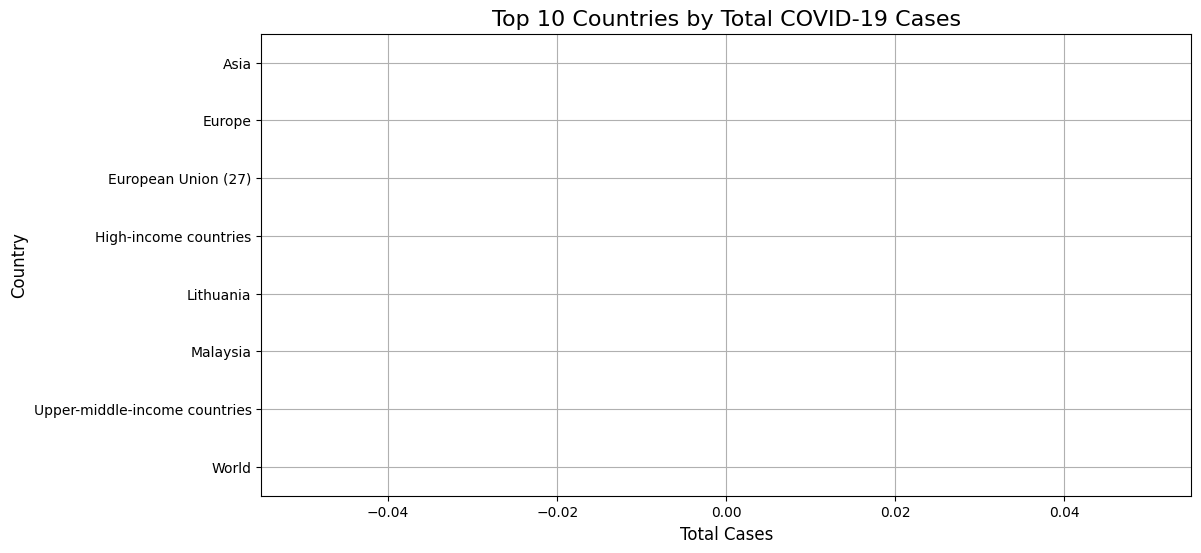

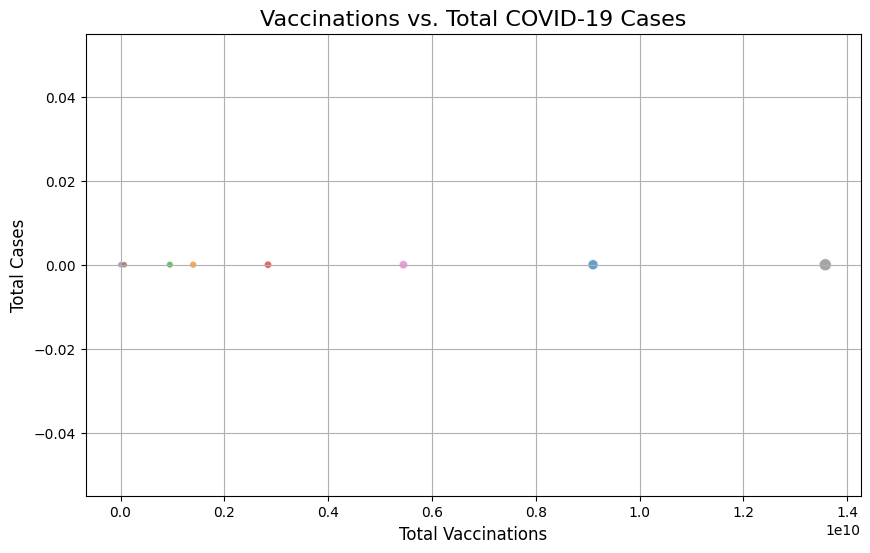

<ipython-input-2-d07e1f07deee>:67: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-2-d07e1f07deee>:74: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




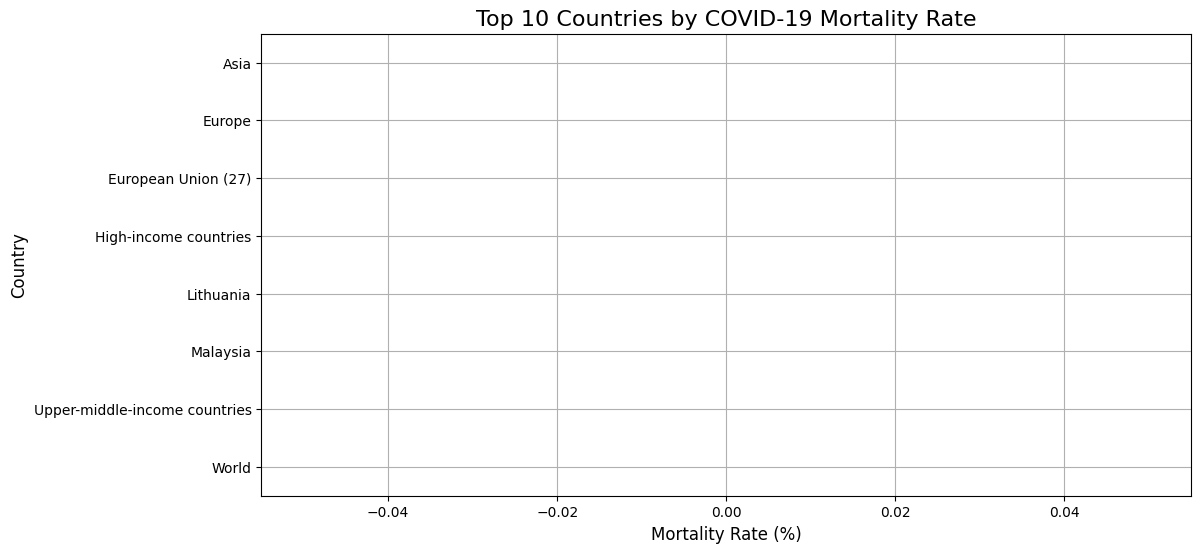

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Select relevant columns
df = df[['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'population']]

# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])

# Handle missing values
df.fillna(0, inplace=True)

# Filter global data for overview
global_data = df.groupby('date').sum().reset_index()

# Line plot for global daily new cases
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_data, x='date', y='new_cases', color='blue')
plt.title('Global Daily New COVID-19 Cases', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Cases', fontsize=12)
plt.grid()
plt.show()

# Get the latest data for each country
latest_data = df[df['date'] == df['date'].max()]

# Top 10 countries by total cases
top_countries = latest_data.sort_values(by='total_cases', ascending=False).head(10)

# Bar plot for top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='total_cases', y='location', palette='viridis')
plt.title('Top 10 Countries by Total COVID-19 Cases', fontsize=16)
plt.xlabel('Total Cases', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid()
plt.show()

# Create a choropleth map for total cases
fig = px.choropleth(
    latest_data,
    locations="location",
    locationmode="country names",
    color="total_cases",
    title="Total COVID-19 Cases by Country",
    color_continuous_scale="Reds"
)
fig.show()

# Scatter plot: Vaccination vs. Total Cases
plt.figure(figsize=(10, 6))
sns.scatterplot(data=latest_data, x='total_vaccinations', y='total_cases', hue='location', size='population', legend=False, alpha=0.7)
plt.title('Vaccinations vs. Total COVID-19 Cases', fontsize=16)
plt.xlabel('Total Vaccinations', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.grid()
plt.show()

# Calculate mortality rate
latest_data['mortality_rate'] = (latest_data['total_deaths'] / latest_data['total_cases']) * 100

# Top 10 countries by mortality rate
top_mortality = latest_data.sort_values(by='mortality_rate', ascending=False).head(10)

# Bar plot for mortality rate
plt.figure(figsize=(12, 6))
sns.barplot(data=top_mortality, x='mortality_rate', y='location', palette='coolwarm')
plt.title('Top 10 Countries by COVID-19 Mortality Rate', fontsize=16)
plt.xlabel('Mortality Rate (%)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid()
plt.show()


